### NLP 

Usando datos de:

https://www.kaggle.com/pradeeptrical/text-tweet-classification


In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('text_classification_dataset.xlsx', index_col=0)


First we have to clean the dataset and tokenize it

In [3]:
df.reset_index(inplace=True)

Workflow que neceesitamos para usar NN en NLP

In [4]:
df.head()

,text,type
0,@ACNI2012 @TheToka920 Never knew having 1 or 2...,sports
1,"MYCA Magical Moments:\n\nSeptember, 2011: Sham...",sports
2,The current state of last year's @BBL finalist...,sports
3,@HOLLYJISOO Why did you bring a cricket...,sports
4,Babar Azam only Pakistani included in the ICC ...,sports


In [5]:
df.type.value_counts()

politics         345
medical          299
entertainment    260
sports           258
Name: type, dtype: int64

## Simple approach using BOW

In [6]:
import nltk
import string
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

#Default stopwords that we would like to delete from our statements
from nltk.corpus import stopwords 

[nltk_data] Downloading package stopwords to /Users/tomas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
sw = stopwords.words('english')

In [8]:
sw.append('')
sw.append('tweet')
sw.append('tweets')
len(sw)

182

In [9]:
import re

def cleantxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) #quitar menciones
    text = re.sub(r'#','',text) #quitar hashtags
    text = re.sub(r'RT','',text) #quitar RT
    text = re.sub(r'https?:\/\/\S+','',text) #quitar links
    
    #El resto es para quitar strings que no tienen sentido, las encuentras mirando detenidamente el dataset
    
    text = re.sub(r'\n\n','',text)
    text = re.sub(r'\n','',text)
    text = re.sub(r':','',text)
    text = re.sub(r'[0-9]','',text)
    text = re.sub(r'_[A-Za-z0-9]+','',text)
    text = re.sub(r'\n[A-Za-z0-9]+','',text)
    text = re.sub(r'\'[A-Za-z0-9]+','',text)
    text = re.sub(r"'","",text)
    text = re.sub(r"...$","",text)
    text = re.sub(r"..$","",text)
    text = re.sub(r"....$","",text)
    text = re.sub(r"...$","",text)
    text = re.sub(r"`","",text)
    text = re.sub(r"-","",text)
    text = re.sub(r"!","",text)
    
    return text

In [10]:
# Limpiamos el texto
df['text'] = df['text'].apply(cleantxt)
df

,text,type
0,Never knew having or followers had anythin...,sports
1,"MYCA Magical MomentsSeptember, Sham Chotoo of...",sports
2,The current state of last year finalists P...,sports
3,Why did you bring,sports
4,Babar Azam only Pakistani included in the ICC ...,sports
...,...,...
1157,The senior is one of the most decorated male t...,sports
1158,COULD be your year to get moving and change t...,sports
1159,thought you liked yellow on me but that OK....,sports
1160,❤️ Tennis greats played together to raise mo...,sports


## Visualization of core words for each class

In [11]:
df.head()

,text,type
0,Never knew having or followers had anythin...,sports
1,"MYCA Magical MomentsSeptember, Sham Chotoo of...",sports
2,The current state of last year finalists P...,sports
3,Why did you bring,sports
4,Babar Azam only Pakistani included in the ICC ...,sports


In [12]:
X=df.text.to_list()
y=df.type.to_list()

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
# Counting the number of words
from collections import Counter
# Plotting functions
import matplotlib.pyplot as plt
y = np.asarray(y)
# Tokenizing the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)


In [14]:
dict_rep = {'sports':1,
           'medical':2,
           'entertainment':3,
           'politics':4}
df.type = df.type.replace(dict_rep)

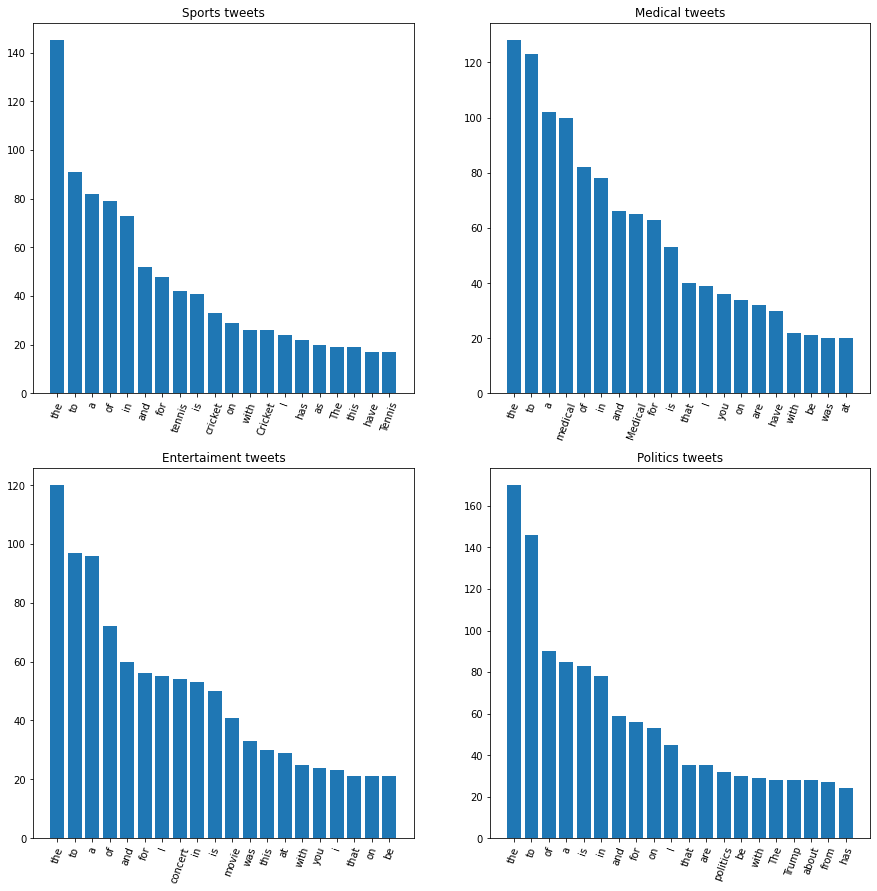

In [15]:
# Getting the most frequent words
d1 = df.loc[df['type']==1, 'text'].tolist()
d2 = df.loc[df['type']==2, 'text'].tolist()
d3 = df.loc[df['type']==3, 'text'].tolist()
d4 = df.loc[df['type']==4, 'text'].tolist()

d1_text = ' '.join(d1).split()
d2_text = ' '.join(d2).split()
d3_text = ' '.join(d3).split()
d4_text = ' '.join(d4).split()

topd1 = Counter(d1_text)
topd2 = Counter(d2_text)
topd3 = Counter(d3_text)
topd4 = Counter(d4_text)

topd1 = topd1.most_common(20)
topd2 = topd2.most_common(20)
topd3 = topd3.most_common(20)
topd4 = topd4.most_common(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.bar(range(len(topd1)), [val[1] for val in topd1], align='center')
plt.xticks(range(len(topd1)), [val[0] for val in topd1])
plt.xticks(rotation=70)
plt.title('Sports tweets')

plt.subplot(2, 2, 2)
plt.bar(range(len(topd2)), [val[1] for val in topd2], align='center')
plt.xticks(range(len(topd2)), [val[0] for val in topd2])
plt.xticks(rotation=70)
plt.title('Medical tweets')

plt.subplot(2, 2, 3)
plt.bar(range(len(topd3)), [val[1] for val in topd3], align='center')
plt.xticks(range(len(topd3)), [val[0] for val in topd3])
plt.xticks(rotation=70)
plt.title('Entertaiment tweets')

plt.subplot(2, 2, 4)
plt.bar(range(len(topd4)), [val[1] for val in topd4], align='center')
plt.xticks(range(len(topd4)), [val[0] for val in topd4])
plt.xticks(rotation=70)
plt.title('Politics tweets')
plt.show()

We still have a lot of words that don't give us any information and they are making noise in the dataset... Let's use stopwords to get rid of them

In [16]:
def lose_stopwords(text):
    text_sp = text.lower().split()
    new_text=[]
    for word in text_sp:
        if word not in sw:
            new_text.append(word)
    new_text = " ".join(new_text)

    return new_text

In [17]:
df.text = df.text.apply(lose_stopwords)

In [18]:
df.head()

,text,type
0,never knew followers anything reality...maling...,1
1,"myca magical momentsseptember, sham chotoo bow...",1
2,current state last year finalists p w l p w l ...,1
3,bring,1
4,babar azam pakistani included icc odi team yea...,1


Now let's plot aggain

/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128079 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128079 missing from current font.
  font.set_text(s, 0, flags=flags)


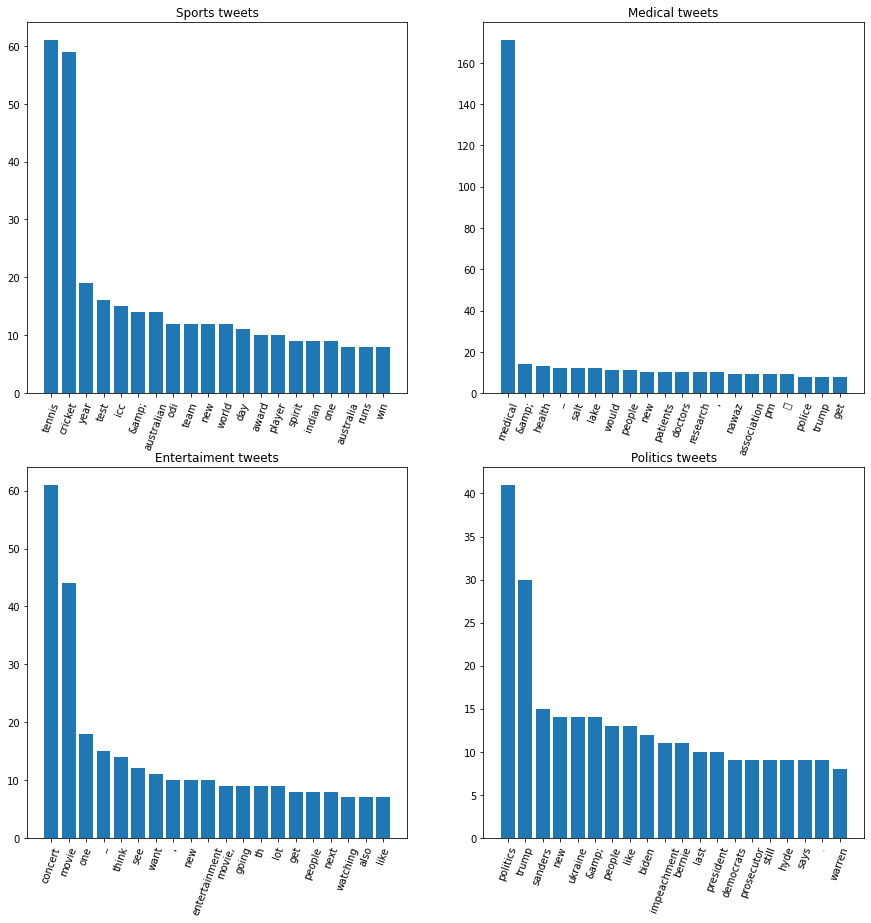

In [19]:
X=df.text.to_list()

# Getting the most frequent words
d1 = df.loc[df['type']==1, 'text'].tolist()
d2 = df.loc[df['type']==2, 'text'].tolist()
d3 = df.loc[df['type']==3, 'text'].tolist()
d4 = df.loc[df['type']==4, 'text'].tolist()

d1_text = ' '.join(d1).split()
d2_text = ' '.join(d2).split()
d3_text = ' '.join(d3).split()
d4_text = ' '.join(d4).split()

topd1 = Counter(d1_text)
topd2 = Counter(d2_text)
topd3 = Counter(d3_text)
topd4 = Counter(d4_text)

topd1 = topd1.most_common(20)
topd2 = topd2.most_common(20)
topd3 = topd3.most_common(20)
topd4 = topd4.most_common(20)


plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.bar(range(len(topd1)), [val[1] for val in topd1], align='center')
plt.xticks(range(len(topd1)), [val[0] for val in topd1])
plt.xticks(rotation=70)
plt.title('Sports tweets')

plt.subplot(2, 2, 2)
plt.bar(range(len(topd2)), [val[1] for val in topd2], align='center')
plt.xticks(range(len(topd2)), [val[0] for val in topd2])
plt.xticks(rotation=70)
plt.title('Medical tweets')

plt.subplot(2, 2, 3)
plt.bar(range(len(topd3)), [val[1] for val in topd3], align='center')
plt.xticks(range(len(topd3)), [val[0] for val in topd3])
plt.xticks(rotation=70)
plt.title('Entertaiment tweets')

plt.subplot(2, 2, 4)
plt.bar(range(len(topd4)), [val[1] for val in topd4], align='center')
plt.xticks(range(len(topd4)), [val[0] for val in topd4])
plt.xticks(rotation=70)
plt.title('Politics tweets')
plt.show()

## Getting Bag of Words

In [20]:
new_text = []
for index in range(df.shape[0]):

    text = df.text[index].split(' ')
    for word in text:
            new_text.append(word)



In [21]:
len(new_text)

10739

In [22]:
final_words = set(new_text)
len(final_words)

5471

In [23]:
dict_words ={}
for word in final_words:
    dict_words[word] = []

In [24]:
for index in range(df.shape[0]):
    sentence = df.text[index].lower().split(' ')
    for word in final_words:
        if word in sentence:
            n_times = sentence.count(word)
            dict_words[word].append(n_times)
        else:
            dict_words[word].append(0)

In [25]:
df_words = pd.DataFrame(dict_words)
df_words.shape

(1162, 5471)

Máximo del Dataframe para normalizar

In [26]:
max_df = df_words.to_numpy().max()
df_words = df_words/max_df

Dataframe a numpy array

In [27]:
X = df_words.to_numpy(float)
X.shape

(1162, 5471)

In [28]:
dict_rep = {'sports':1,
           'medical':2,
           'entertainment':3,
           'politics':4}
y = df.type
y = y.replace(dict_rep)
y = np.array(y).astype(int)
y[0]

1

In [29]:
from sklearn.model_selection import train_test_split

trainingX,testX,trainingy,testy = train_test_split(X,y, stratify=y)

In [30]:
print(trainingX.shape,testX.shape,trainingy.shape, testy.shape)

(871, 5471) (291, 5471) (871,) (291,)


## NEURAL NETWOK

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LeakyReLU

In [40]:

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(64, activation='selu'),
                                    tf.keras.layers.Dense(32, activation='selu'),
                                    tf.keras.layers.Dense(16, activation='selu'),
                                    tf.keras.layers.Dense(5, activation='softmax')])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(trainingX, trainingy, epochs=10, verbose=1, batch_size = 32)

model.evaluate(testX, testy)




Epoch 1/10
28/28 [==============================] - 0s 2ms/step - loss: 1.4814 - accuracy: 0.2962
Epoch 2/10
28/28 [==============================] - 0s 2ms/step - loss: 1.2458 - accuracy: 0.4386
Epoch 3/10
28/28 [==============================] - 0s 3ms/step - loss: 0.8781 - accuracy: 0.8760
Epoch 4/10
28/28 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.9770
Epoch 5/10
28/28 [==============================] - 0s 3ms/step - loss: 0.1535 - accuracy: 0.9897
Epoch 6/10
28/28 [==============================] - 0s 3ms/step - loss: 0.0786 - accuracy: 0.9885
Epoch 7/10
28/28 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9931
Epoch 8/10
28/28 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9931
Epoch 9/10
28/28 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9931
Epoch 10/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.7904


[0.6779640316963196, 0.7903780341148376]